# Electric Vehicles Market Size Analysis using Python


# Table of Contents
1. [Introduction](#Introduction)
2. [Data Collection](#Data-Collection)
3. [Data Cleaning](#Data-Cleaning)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - 4.1 [EV Adoption Over Time](#EV-Adoption-Over-Time)
    - 4.2 [Geographical Distribution](#Geographical-Distribution)
    - 4.3 [Electric Vehicle Types](#Electric-Vehicle-Types)
    - 4.4 [Popular EV Makes and Models](#Popular-EV-Makes-and-Models)
    - 4.5 [Electric Range Analysis](#Electric-Range-Analysis)
5. [Market Size Estimation](#Market-Size-Estimation)
6. [Conclusion](#Conclusion)


## Introduction <a id="Introduction"></a>
Electric Vehicles (EVs) are becoming increasingly popular, with growing market potential. This project aims to analyze the EV market size, focusing on adoption trends, geographical distribution, popular EV models, and range analysis. Finally, we will estimate the future market size using historical data.


## Data Collection <a id="Data-Collection"></a>



In [3]:
import pandas as pd

# Load the dataset
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Display the first few rows
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


## Data Cleaning <a id="Data-Cleaning"></a>

In [4]:
# Check for missing values
ev_data.isnull().sum()

# Drop rows with missing data
ev_data = ev_data.dropna()

# Display cleaned data
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

## EV Adoption Over Time <a id="EV-Adoption-Over-Time"></a>



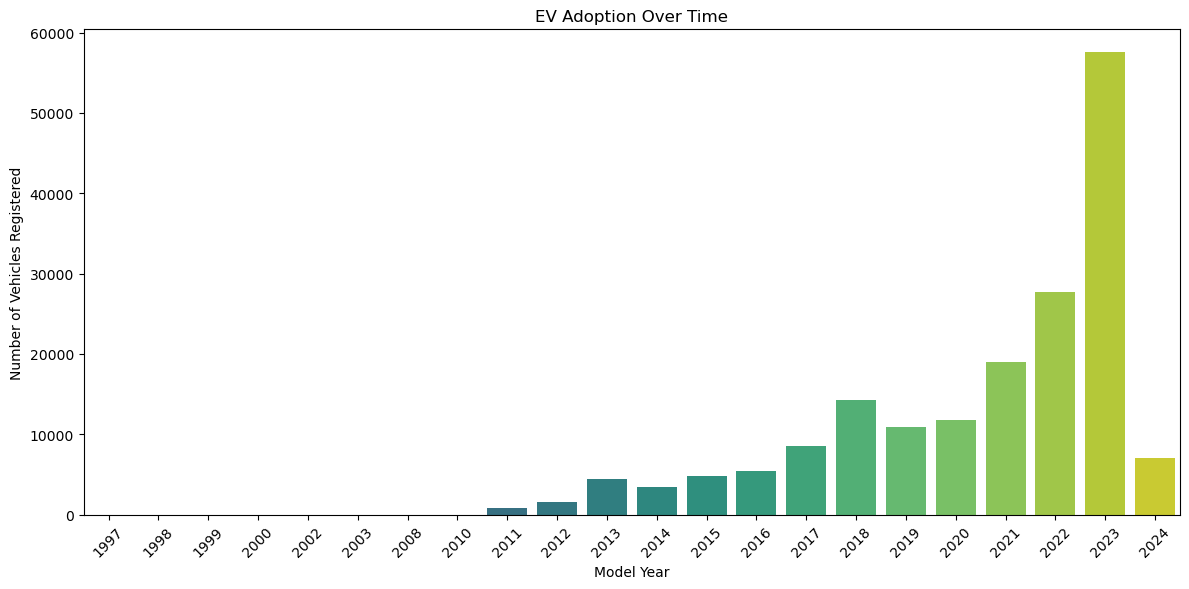

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Geographical Distribution <a id="Geographical-Distribution"></a>

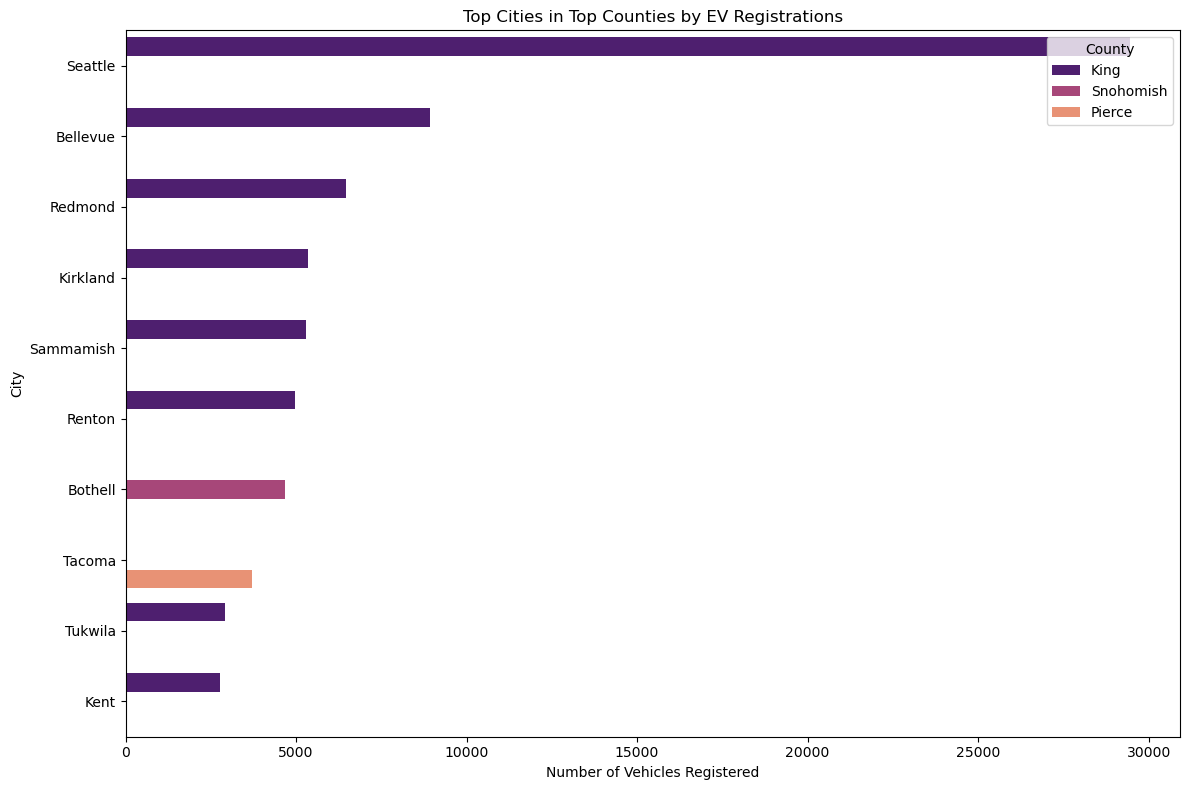

In [7]:
# Analyze distribution of EVs across counties and cities
ev_county_distribution = ev_data['County'].value_counts().head(3)
top_counties = ev_county_distribution.index

top_counties_data = ev_data[ev_data['County'].isin(top_counties)]
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=ev_city_distribution_top_counties.head(10), palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

## Electric Vehicle Types <a id="Electric-Vehicle-Types"></a>

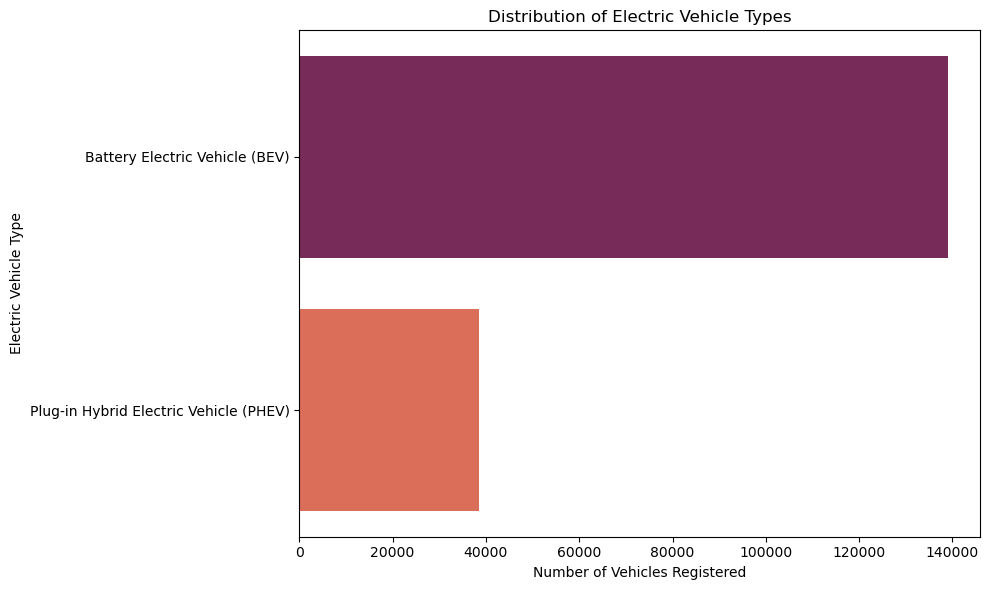

In [8]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

## Popular EV Makes and Models <a id="Popular-EV-Makes-and-Models"></a>

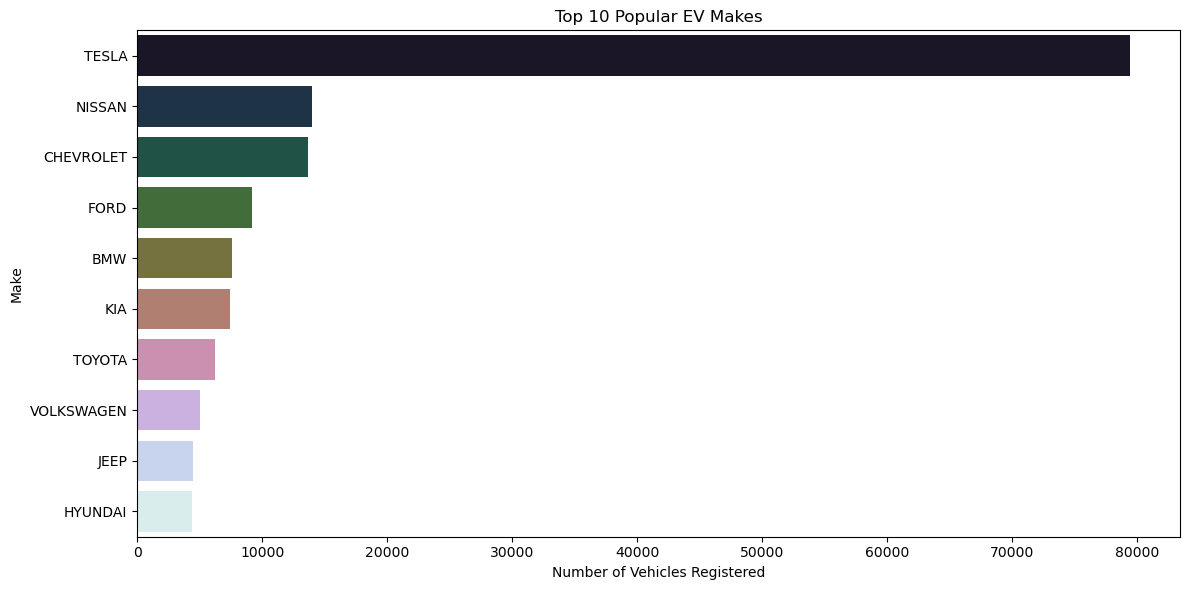

In [9]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

## Electric Range Analysis <a id="Electric-Range-Analysis"></a>

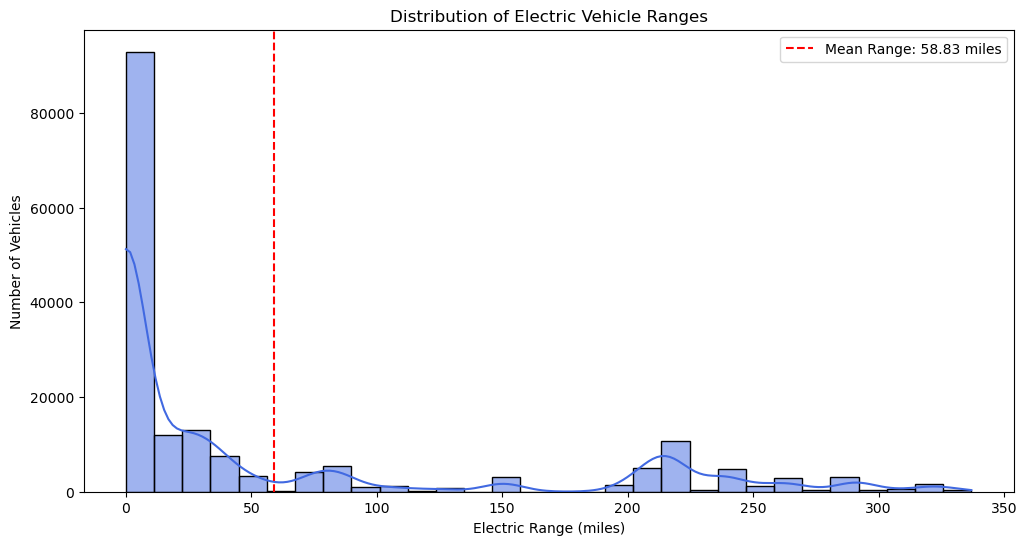

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

## Market Size Estimation <a id="Market-Size-Estimation"></a>

In [13]:
# Calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()


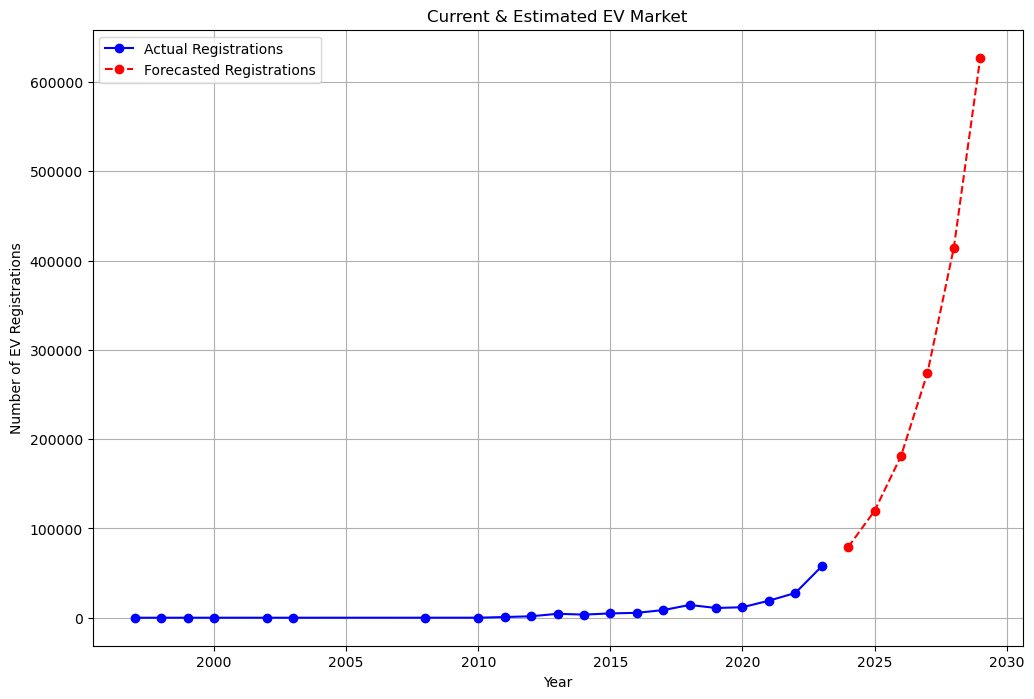

In [14]:
from scipy.optimize import curve_fit
import numpy as np

# Filter data for years up to 2023
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# Exponential growth function
def exp_growth(x, a, b):
    return a * np.exp(b * x)

x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# Curve fitting
params, _ = curve_fit(exp_growth, x_data, y_data)

# Forecasting
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# Visualization
plt.figure(figsize=(12, 8))
plt.plot(filtered_years.index, filtered_years.values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years + filtered_years.index.min(), forecasted_values, 'ro--', label='Forecasted Registrations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion <a id="Conclusion"></a>
This analysis reveals a strong growth trend in the electric vehicle market, with expectations for significant increases in adoption over the coming years. Businesses should consider these trends when planning their market entry or expansion strategies.
